<a href="https://colab.research.google.com/github/Elish-Ab/AI_Mastery_10x_Week8_9/blob/main/notebooks/Task_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow
!pip install shap

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers
import mlflow
import mlflow.sklearn
import shap

In [ ]:
# Load datasets
fraud_data = pd.read_csv('Fraud_Data.csv')
credit_data = pd.read_csv('creditcard.csv')


In [ ]:
# Fraud_Data.csv
# Convert 'purchase_time' to datetime
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert 'purchase_time' to datetime
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Extract useful time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.weekday

# Drop columns not needed for training
X_fraud = fraud_data.drop(columns=['purchase_time', 'signup_time', 'class', 'user_id', 'device_id', 'ip_address'])

# One-hot encode categorical columns (e.g., 'source', 'browser', 'sex')
X_fraud = pd.get_dummies(X_fraud, columns=['source', 'browser', 'sex'], drop_first=True)

# Separate target variable
y_fraud = fraud_data['class']

# Split data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42)

# creditcard.csv
X_credit = credit_data.drop(columns=['Class'])
y_credit = credit_data['Class']
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.3, random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"{name} Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Start MLflow experiment tracking
mlflow.end_run()  # Ensure any previous run is closed
mlflow.start_run()

# Scaling data
scaler = StandardScaler()
X_train_fraud_scaled = scaler.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler.transform(X_test_fraud)
X_train_credit_scaled = scaler.fit_transform(X_train_credit)
X_test_credit_scaled = scaler.transform(X_test_credit)

Model training and Evaluation

Logistic Regression (Fraud Data) Report:
               precision    recall  f1-score   support

           0       0.91      0.54      0.68     41117
           1       0.10      0.50      0.17      4217

    accuracy                           0.54     45334
   macro avg       0.51      0.52      0.42     45334
weighted avg       0.84      0.54      0.63     45334



2024/11/13 13:37:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


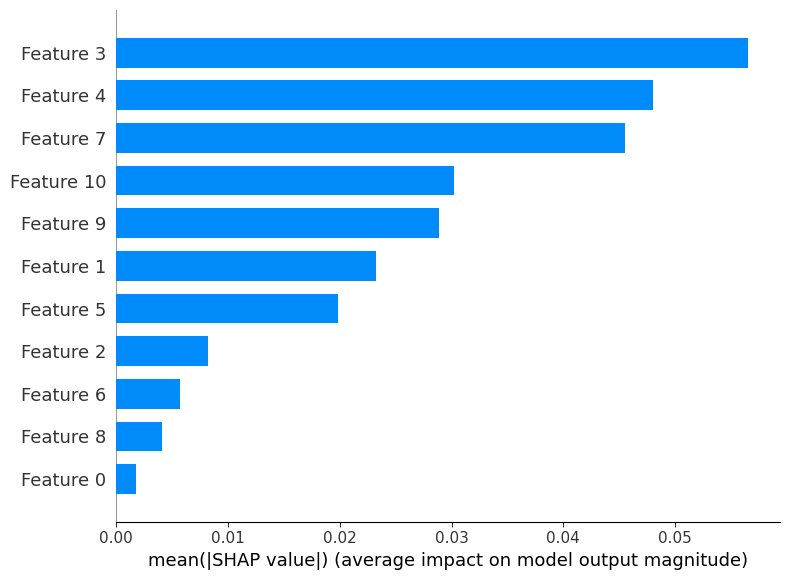

Logistic Regression (Credit Data) Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



2024/11/13 13:37:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


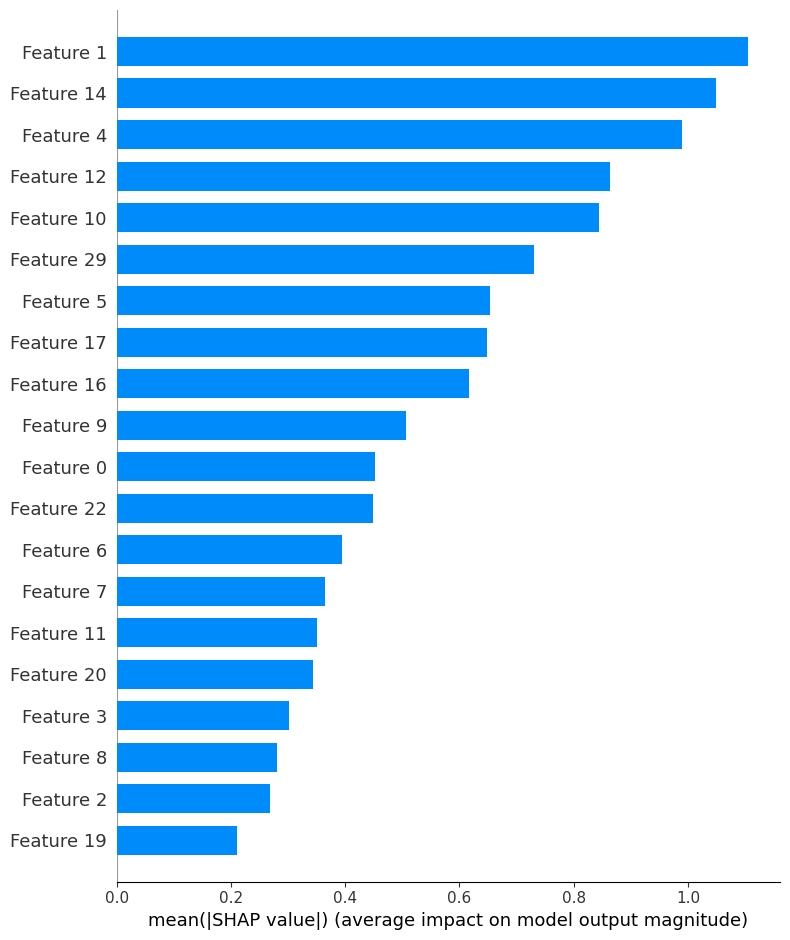

Decision Tree (Fraud Data) Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     41117
           1       0.45      0.57      0.50      4217

    accuracy                           0.89     45334
   macro avg       0.70      0.75      0.72     45334
weighted avg       0.91      0.89      0.90     45334



2024/11/13 13:38:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


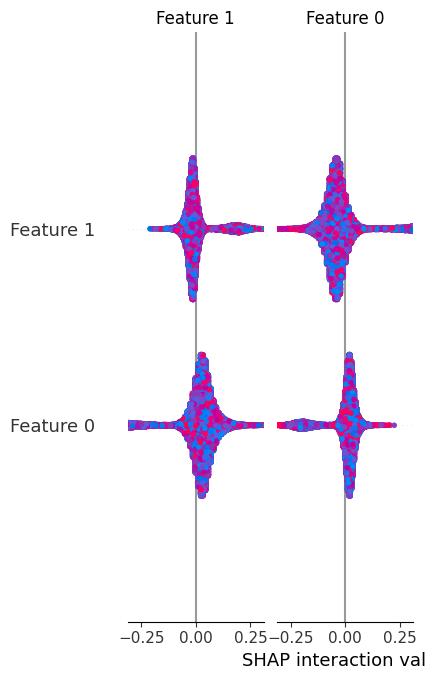

Random Forest (Fraud Data) Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     41117
           1       0.95      0.54      0.69      4217

    accuracy                           0.95     45334
   macro avg       0.95      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



2024/11/13 13:43:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"{name} Report:\n", classification_report(y_test, y_pred))

# Ensure previous MLflow run is ended
mlflow.end_run()

# Start the main MLflow run
with mlflow.start_run() as parent_run:

    # Logistic Regression (Fraud Data)
    with mlflow.start_run(nested=True):
        logreg_fraud = LogisticRegression(class_weight='balanced')
        logreg_fraud.fit(X_train_fraud_scaled, y_train_fraud)
        evaluate_model(logreg_fraud, X_test_fraud_scaled, y_test_fraud, "Logistic Regression (Fraud Data)")
        mlflow.log_param("Model", "Logistic Regression (Fraud Data)")
        mlflow.log_metric("Accuracy_Fraud_Data", logreg_fraud.score(X_test_fraud_scaled, y_test_fraud))
        mlflow.sklearn.log_model(logreg_fraud, "logreg_fraud_model")


        # SHAP explanation for Logistic Regression
        explainer_logreg = shap.LinearExplainer(logreg_fraud, X_train_fraud_scaled)
        shap_values_logreg = explainer_logreg.shap_values(X_test_fraud_scaled)
        shap.summary_plot(shap_values_logreg, X_test_fraud_scaled, plot_type="bar")


    # Logistic Regression (Credit Data)
    with mlflow.start_run(nested=True):
        logreg_credit = LogisticRegression(class_weight='balanced')
        logreg_credit.fit(X_train_credit_scaled, y_train_credit)
        evaluate_model(logreg_credit, X_test_credit_scaled, y_test_credit, "Logistic Regression (Credit Data)")
        mlflow.log_param("Model", "Logistic Regression (Credit Data)")
        mlflow.log_metric("Accuracy_Credit_Data", logreg_credit.score(X_test_credit_scaled, y_test_credit))
        mlflow.sklearn.log_model(logreg_credit, "logreg_credit_model")

         # SHAP explanation for Logistic Regression (Credit Data)
        explainer_logreg_credit = shap.LinearExplainer(logreg_credit, X_train_credit_scaled)
        shap_values_logreg_credit = explainer_logreg_credit.shap_values(X_test_credit_scaled)
        shap.summary_plot(shap_values_logreg_credit, X_test_credit_scaled, plot_type="bar")


    # Decision Tree (Fraud Data)
    with mlflow.start_run(nested=True):
        dtree_fraud = DecisionTreeClassifier(random_state=42)
        dtree_fraud.fit(X_train_fraud_scaled, y_train_fraud)
        evaluate_model(dtree_fraud, X_test_fraud_scaled, y_test_fraud, "Decision Tree (Fraud Data)")
        mlflow.log_param("Model", "Decision Tree (Fraud Data)")
        mlflow.log_metric("Accuracy_Fraud_Data_DTree", dtree_fraud.score(X_test_fraud_scaled, y_test_fraud))
        mlflow.sklearn.log_model(dtree_fraud, "dtree_fraud_model")

        # SHAP explanation for Decision Tree
        explainer_dtree = shap.TreeExplainer(dtree_fraud)
        shap_values_dtree = explainer_dtree.shap_values(X_test_fraud_scaled)
        shap.summary_plot(shap_values_dtree, X_test_fraud_scaled, plot_type="bar")

    # Random Forest (Fraud Data)
    with mlflow.start_run(nested=True):
        rf_fraud = RandomForestClassifier(random_state=42)
        rf_fraud.fit(X_train_fraud_scaled, y_train_fraud)
        evaluate_model(rf_fraud, X_test_fraud_scaled, y_test_fraud, "Random Forest (Fraud Data)")
        mlflow.log_param("Model", "Random Forest (Fraud Data)")
        mlflow.log_metric("Accuracy_Fraud_Data_RF", rf_fraud.score(X_test_fraud_scaled, y_test_fraud))
        mlflow.sklearn.log_model(rf_fraud, "rf_fraud_model")


        # SHAP explanation for Random Forest
        explainer_rf = shap.TreeExplainer(rf_fraud)
        shap_values_rf = explainer_rf.shap_values(X_test_fraud_scaled)
        shap.summary_plot(shap_values_rf, X_test_fraud_scaled, plot_type="bar")

    # Gradient Boosting (Fraud Data)
    with mlflow.start_run(nested=True):
        gb_fraud = GradientBoostingClassifier(random_state=42)
        gb_fraud.fit(X_train_fraud_scaled, y_train_fraud)
        evaluate_model(gb_fraud, X_test_fraud_scaled, y_test_fraud, "Gradient Boosting (Fraud Data)")
        mlflow.log_param("Model", "Gradient Boosting (Fraud Data)")
        mlflow.log_metric("Accuracy_Fraud_Data_GB", gb_fraud.score(X_test_fraud_scaled, y_test_fraud))
        mlflow.sklearn.log_model(gb_fraud, "gb_fraud_model")

         # SHAP explanation for Gradient Boosting
        explainer_gb = shap.TreeExplainer(gb_fraud)
        shap_values_gb = explainer_gb.shap_values(X_test_fraud_scaled)
        shap.summary_plot(shap_values_gb, X_test_fraud_scaled, plot_type="bar")

    # Multi-Layer Perceptron (MLP) with TensorFlow (Fraud Data)
    with mlflow.start_run(nested=True):
        mlp_model = tf.keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train_fraud_scaled.shape[1],)),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])

        mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        mlp_model.fit(X_train_fraud_scaled, y_train_fraud, epochs=10, batch_size=32, validation_split=0.2)

        # Evaluate MLP model
        mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test_fraud_scaled, y_test_fraud)
        mlflow.log_param("Model", "MLP (Fraud Data)")
        mlflow.log_metric("Accuracy_Fraud_Data_MLP", mlp_accuracy)

        # Log the MLP model using mlflow.tensorflow
        mlflow.tensorflow.log_model(mlp_model, "mlp_fraud_model")

         # SHAP explanation for MLP (KernelExplainer used due to TensorFlow)
        explainer_mlp = shap.KernelExplainer(mlp_model.predict, X_train_fraud_scaled[:100])  # Limited to a subset for KernelExplainer
        shap_values_mlp = explainer_mlp.shap_values(X_test_fraud_scaled[:10])  # Limited sample for computation speed
        shap.summary_plot(shap_values_mlp, X_test_fraud_scaled[:10], plot_type="bar")


# End MLflow parent run
mlflow.end_run()